# **Capstone Project: E-commerce Sales Analysis**: 🎓📊

<h1 style="font-size: 50px; font-family: Arial, sans-serif; color: #4CAF50;">
  Team Information 👥

</h1>

---


**Team 8** - Sprints Bootcamp

**Team Members:**
  ```
Remas
Menna Magdy Mohamed
Ibrahim Abdel Basir Gomaa
Fady Raouf
Mohamed Alaa Farrag
```




# **Setting Up the Environment** 🛠️

---



In [1]:
!pip install pandas numpy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable


##Import libraries

In [29]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import datetime as dt# For handling time series data
import seaborn as sns  # For statistical data visualization




##Load the DataSet

In [4]:
data_sales = pd.read_csv('data.csv', encoding='unicode_escape')

##Set Plot Style (Optional)



In [5]:
print(data_sales)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

## Basic Data Overview

In [6]:
print(data_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


# 🎯 **Task 1 : Data Cleaning** 🧹
**Description**: Clean and preprocess the dataset by handling missing values, formatting data types, and removing incorrect records.

**Requirments**:
- Handle missing values in CustomerID
- Convert InvoiceDate to DateTime type
- Remove rows with negative Quantity or UnitPrice
- Create a TotalPrice column




In [7]:
#detect missing data
missing_sales=data_sales.isnull().sum()
print(missing_sales)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
# Fill missing CustomerID by propagating from InvoiceNo group
# data_sales['CustomerID'] = data_sales.groupby('InvoiceNo')['CustomerID'].transform(lambda x: x.ffill().bfill())
# Handle missing values in CustomerID (e.g., fill with a placeholder or drop rows)
data_sales['CustomerID'].fillna('Unknown', inplace=True)



InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [10]:

# Convert InvoiceDate to DateTime type
data_sales['InvoiceDate'] = pd.to_datetime(data_sales['InvoiceDate'])

print(data_sales['InvoiceDate'])

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]


In [16]:
# Remove rows with negative Quantity or UnitPrice
data_sales = data_sales[(data_sales['Quantity'] > 0) & (data_sales['UnitPrice'] > 0)]


In [17]:
# Create a TotalPrice column (Quantity * UnitPrice)
data_sales['TotalPrice'] = data_sales['Quantity'] * data_sales['UnitPrice']

print(data_sales.info())

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   530104 non-null  object        
 7   Country      530104 non-null  object        
 8   TotalPrice   530104 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.4+ MB
None


In [19]:
#detect missing data after cleaning
missing_sales=data_sales.isnull().sum()
print(missing_sales)
print(data_sales.info())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   530104 non-null  object        
 7   Country      530104 non-null  object        
 8   TotalPrice   530104 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.4+ MB
None


# 🎯 **Task 2 : Exploratory Data Analysis (EDA)** 🔍
**Description**: Perform basic descriptive statistics and identify insights from the dataset. Analyze top-selling products and calculate total revenue and transactions.values. You will also check the data types of each column to understand how the data is structured.

**Requirments**:
-  Use .describe() for statistical summary.
- Identify top 10 selling products by Quantity.
- Calculate total revenue and number of transactions.



In [20]:
# Statistical summary
print(data_sales.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  530104.000000                         530104  530104.000000   
mean       10.542037  2011-07-04 20:16:05.225087744       3.907625   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         1.000000            2011-03-28 12:22:00       1.250000   
50%         3.000000            2011-07-20 12:58:00       2.080000   
75%        10.000000            2011-10-19 12:39:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   13541.330000   
std       155.524124                            NaN      35.915681   

          TotalPrice  
count  530104.000000  
mean       20.121871  
min         0.001000  
25%         3.750000  
50%         9.900000  
75%        17.700000  
max    168469.600000  
std       270.356743  


In [21]:
# Top 10 selling products by Quantity
top_products = data_sales.groupby('Description')['Quantity'].sum().nlargest(10)
print(top_products)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64


In [23]:
# Total revenue and number of transactions
total_revenue = data_sales['TotalPrice'].sum()
total_transactions = data_sales['InvoiceNo'].nunique()
print(f"Total Revenue: {total_revenue}")
print(f"Total Transactions: {total_transactions}")

Total Revenue: 10666684.544
Total Transactions: 19960


In [24]:
# Check data types of each column
print("\nData Types:")
print(data_sales.dtypes)


Data Types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
TotalPrice            float64
dtype: object


# 🎯 **Task 3 : Time Series Analysis** 📅📈
**Description**: Analyze sales trends over time and visualize monthly sales. Identify months with highest and lowest sales.

**Requirments**:
-  Resample the data to obtain monthly sales
-  Plot monthly sales trends using a line plot.
-  Identify the month with the highest and lowest sales.


In [26]:
# Resample data to obtain monthly sales
monthly_sales = data_sales.resample('ME', on='InvoiceDate')['TotalPrice'].sum()

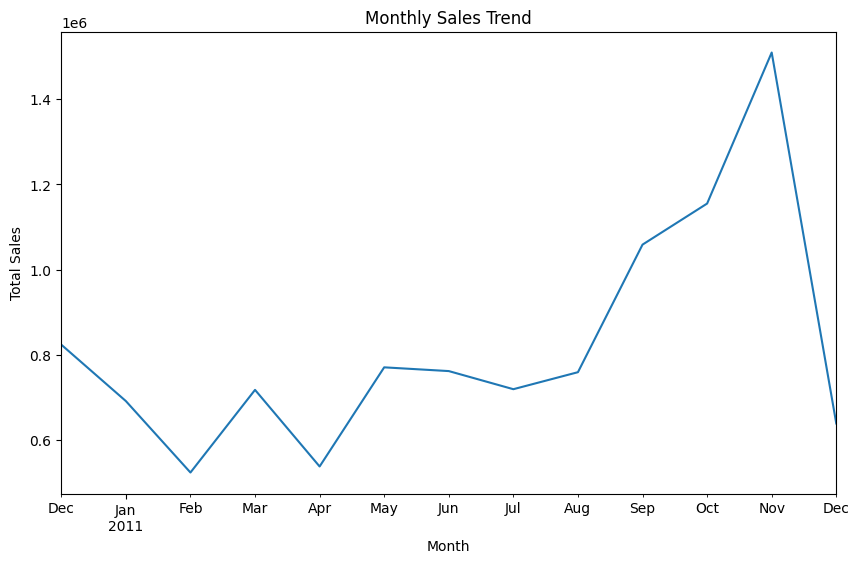

In [27]:
# Plot monthly sales trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [28]:
 #Identify the month with the highest and lowest sales
highest_sales_month = monthly_sales.idxmax()
lowest_sales_month = monthly_sales.idxmin()
print(f"Highest Sales Month: {highest_sales_month}")
print(f"Lowest Sales Month: {lowest_sales_month}")

Highest Sales Month: 2011-11-30 00:00:00
Lowest Sales Month: 2011-02-28 00:00:00


# 🎯 **Task 4 : RFM Analysis (Customer Segmentation)** 🧩
**Description**: Segment customers based on recency, frequency, and monetary value. Visualize customer distribution in segments.

**Requirments**:
-  Calculate recency (days since last purchase).
-  Calculate frequency (number of purchases).
-  Calculate monetary value (total spend).
-  Segment customers into High, Medium, Low-value groups.



In [33]:
# Calculate Recency, Frequency, and Monetary value
snapshot_date = data_sales['InvoiceDate'].max() + dt.timedelta(days=1)
rfm = data_sales.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [36]:
# Segment customers
rfm['Segment'] = pd.qcut(rfm['Monetary'], 3, labels=['Low', 'Medium', 'High'])
print(rfm.head())

            Recency  Frequency  Monetary Segment
CustomerID                                      
12346.0         326          1  77183.60    High
12347.0           2          7   4310.00    High
12348.0          75          4   1797.24    High
12349.0          19          1   1757.55    High
12350.0         310          1    334.40     Low


# 🎯 **Task 5 : Product Category Analysis** 📦💰
**Description**: Analyze sales and revenue by product category and visualize the top categories by revenue.

**Requirments**:
-  Extract product category from Description.
-  Calculate sales and revenue by category.
-  Create a bar plot of the top 5 categories by revenue.



In [37]:
# Extract product category from Description
data_sales['Category'] = data_sales['Description'].apply(lambda x: x.split()[0])

In [38]:
# Calculate sales and revenue by category
category_revenue = data_sales.groupby('Category')['TotalPrice'].sum().nlargest(5)

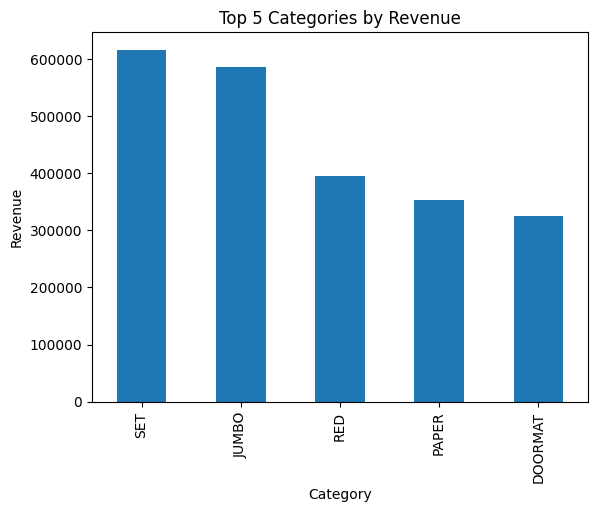

In [39]:
# Create a bar plot of the top 5 categories by revenue
category_revenue.plot(kind='bar', title='Top 5 Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

# 🎯 **Task 6 : Geographical Analysis** 🌍📊
**Description**: Analyze sales distribution by country and identify top revenue-generating countries.

**Requirments**:
-  Calculate total revenue by country.
-  Create a bar plot of the top 10 countries by revenue.
-  Calculate the percentage of sales from the top 3 countries.



In [41]:
# Calculate total revenue by country
country_revenue = data_sales.groupby('Country')['TotalPrice'].sum()

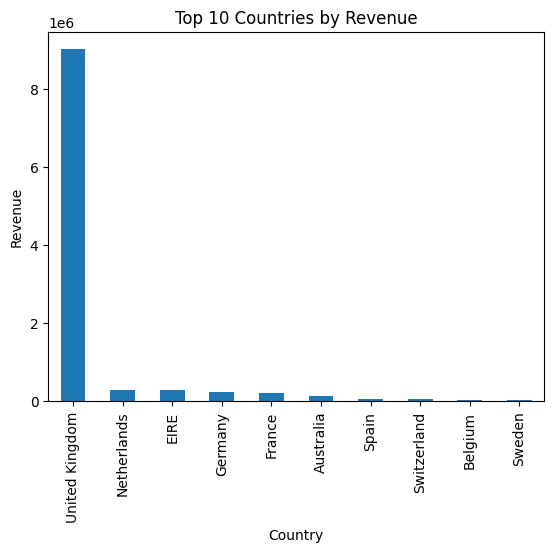

In [43]:
# Create a bar plot of the top 10 countries by revenue
country_revenue.nlargest(10).plot(kind='bar', title='Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()

In [44]:
# Calculate the percentage of sales from the top 3 countries
top_3_countries = country_revenue.nlargest(3).sum() / country_revenue.sum() * 100
print(f"Percentage of Sales from Top 3 Countries: {top_3_countries:.2f}%")

Percentage of Sales from Top 3 Countries: 89.94%


# 🎯 **Task 7 : Customer Behavior Analysis** 👤🛒
**Description**: Analyze customer behavior based on order quantity, sales, and purchasing patterns.

**Requirments**:
-  Plot the distribution of order quantities.
-  Create a scatter plot of Quantity vs. TotalPrice.
-  Calculate and plot average daily sales throughout the week.



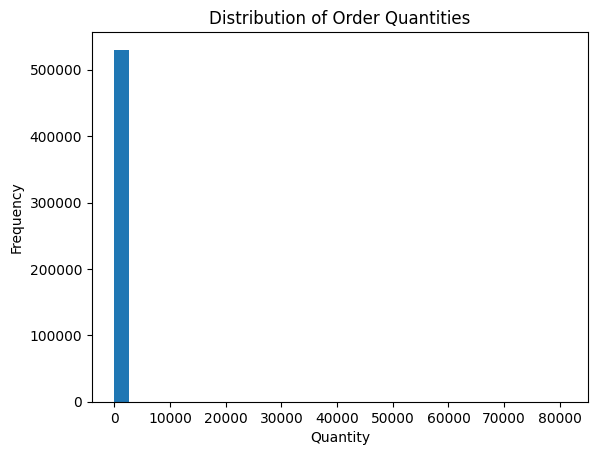

In [45]:
# Plot the distribution of order quantities
data_sales['Quantity'].plot(kind='hist', bins=30, title='Distribution of Order Quantities')
plt.xlabel('Quantity')
plt.show()


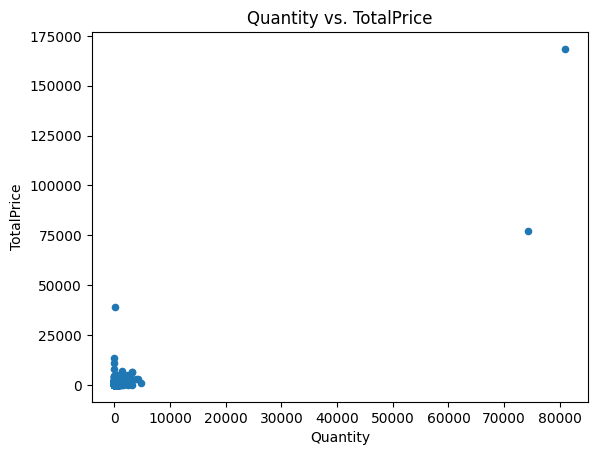

In [46]:
# Create a scatter plot of Quantity vs. TotalPrice
data_sales.plot.scatter(x='Quantity', y='TotalPrice', title='Quantity vs. TotalPrice')
plt.show()

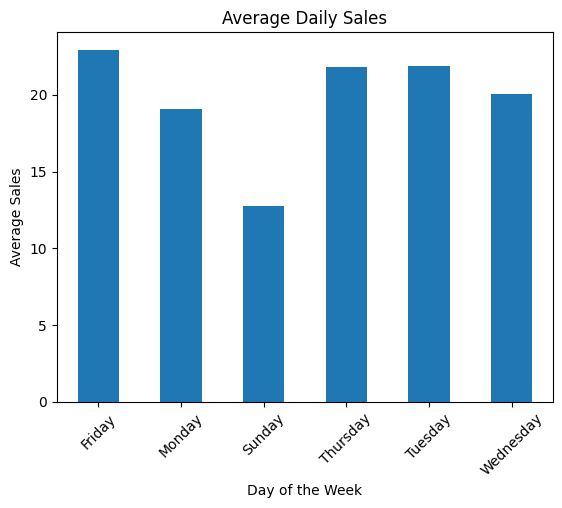

In [48]:
# Calculate and plot average daily sales throughout the week
data_sales['DayOfWeek'] = data_sales['InvoiceDate'].dt.day_name()
average_daily_sales = data_sales.groupby('DayOfWeek')['TotalPrice'].mean()
average_daily_sales.plot(kind='bar', title='Average Daily Sales')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Average Sales')
plt.show()

# 🎯 **Task 8 : Moving Average Forecast** 📉🔮
**Description**: Implement a basic moving average forecast for sales based on past data.

**Requirments**:
-  Prepare daily sales data.
-  Calculate a 7-day moving average of sales.
-  Plot actual sales vs. moving average for the last 3 months.


# 🎯 **Task 9 : Summary Dashboard Creation** 📊📺
**Description**: Create a dashboard that summarizes key insights through visualizations.

**Requirments**:

Create a 2x2 subplot with:
  1.   Monthly sales trend
  2.   Top 5 products by revenue
  3.   Customer segment distribution
  4.   Top 5 countries by revenue.




# 🎯 **Task 10 : Optimize Data Processing** ⚡💻
**Description**: Optimize a computationally intensive task using vectorized operations.

**Requirments**:
-  Implement a task using loops.
-  Implement the same task using vectorized operations.
-  Compare and report performance differences.




# 🎯 **Task 11 : Report Generation** 📜📋
**Description**: Generate a summary report with key insights and recommendations.

**Requirments**:
-  Summarize overall revenue, top-selling products, best customer segments, and countries.
-  Provide insights from time series analysis and recommendations.


